## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', None)

In [2]:
df =pd.read_csv('Copy of transactions1.csv', sep=';')
df.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,transaction_id,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,5533441,733493772,733493772,5000,5000.0,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,01/04/2020,03/08/2014,03/08/2014,492,492,9184,PURCHASE,True,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False
1,5533442,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,01/06/2023,03/08/2014,03/08/2014,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,5533443,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.4,Lyft,US,US,5.0,1.0,rideshare,01/12/2027,03/08/2014,03/08/2014,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,5533444,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,01/09/2029,03/08/2014,03/08/2014,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,5533445,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.0,Lyft,US,US,2.0,1.0,rideshare,01/10/2024,03/08/2014,03/08/2014,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [3]:
#transfrom datetime column
df['transactionDateTime'] = df['transactionDateTime'].str.replace('T', ' ')
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format='%d/%m/%Y', errors='coerce')
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], format='%d/%m/%Y', errors='coerce')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], format='%d/%m/%Y', errors='coerce')

## Missing Values

In [4]:
#missing values function
def missing_values(df):
    missing = df.isnull().sum()
    percentage = missing / df.shape[0]
    dtype = df.dtypes
    
    missing_table = pd.concat([missing, percentage, dtype], axis=1)
    missing_table = missing_table[missing_table.iloc[:,1] != 0].sort_values(1, ascending=False).round(1)
    missing_table.columns = ['Missing Values', 'Percentage', 'Data Type']
    missing_table = missing_table.reset_index()
    
    return missing_table  

In [5]:
missing_values(df)

,index,Missing Values,Percentage,Data Type
0,echoBuffer,641914,1.0,float64
1,merchantCity,641914,1.0,float64
2,merchantState,641914,1.0,float64
3,merchantZip,641914,1.0,float64
4,posOnPremises,641914,1.0,float64
5,recurringAuthInd,641914,1.0,float64
6,acqCountry,3913,0.0,object
7,posEntryMode,3345,0.0,float64
8,merchantCountryCode,624,0.0,object
9,transactionType,589,0.0,object


In [6]:
df = df.drop(['echoBuffer', 'merchantCity','merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1)

In [7]:
df['merchantCountryCode'] = df['merchantCountryCode'].fillna('unspecified')
df['acqCountry'] = df['acqCountry'].fillna('unspecified')

df['transactionType'] = df['transactionType'].fillna('PURCHASE')

df['posConditionCode'] = df['posConditionCode'].fillna(0)
df['posEntryMode'] = df['posEntryMode'].fillna(0)

In [8]:
missing_values(df)

,index,Missing Values,Percentage,Data Type


## Data Type

In [9]:
object_cols = df.select_dtypes('object').columns
object_cols

Index(['availableMoney', 'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'merchantCategoryCode', 'transactionType',
       'currentBalance'],
      dtype='object')

In [10]:
num_cols = df.select_dtypes(['int64', 'float64']).columns
num_cols

Index(['transaction_id', 'accountNumber', 'customerId', 'creditLimit',
       'posEntryMode', 'posConditionCode', 'cardCVV', 'enteredCVV',
       'cardLast4Digits'],
      dtype='object')

In [11]:
bool_cols = df.select_dtypes('bool').columns
bool_cols

Index(['isFraud', 'cardPresent', 'expirationDateKeyInMatch'], dtype='object')

In [12]:
#see object columns contents
for cols in object_cols:
    print('Column {}, unique values are: {}'.format(cols, df[cols].unique()))

Column availableMoney, unique values are: ['5000.0' '4888.67' '4863.92' ... '2566.12' '2574.02' '2568.65']
Column transactionAmount, unique values are: ['111.33' '24.75' '187.4' ... '695.87' '607.64' '883.79']
Column merchantName, unique values are: ['Lyft' 'Uber' 'Fresh eCards' ... 'Runners #332755' 'Curves #440052'
 'Virgin #218063']
Column acqCountry, unique values are: ['US' 'unspecified' 'PR' 'MEX' 'CAN']
Column merchantCountryCode, unique values are: ['US' 'PR' 'MEX' 'unspecified' 'CAN']
Column merchantCategoryCode, unique values are: ['rideshare' 'online_gifts' 'personal care' 'fastfood' 'entertainment'
 'online_subscriptions' 'mobileapps' 'fuel' 'food' 'online_retail'
 'airline' 'hotels' 'food_delivery' 'cable/phone' 'subscriptions' 'auto'
 'gym' 'furniture' 'health']
Column transactionType, unique values are: ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL']
Column currentBalance, unique values are: ['0.0' '111.33' '136.08' ... '4925.98' '4931.35' '5293.47']


In [13]:
#change to numeric, error will beb NaN
df['availableMoney'] = pd.to_numeric(df['availableMoney'], errors='coerce')
df['transactionAmount'] = pd.to_numeric(df['transactionAmount'], errors='coerce')
df['currentBalance'] = pd.to_numeric(df['currentBalance'], errors='coerce')

In [16]:
missing_values(df)

,index,Missing Values,Percentage,Data Type
0,transactionAmount,1816,0.0,float64
1,currentBalance,120,0.0,float64


In [17]:
#available money is credit limit - current balance
df.loc[df['availableMoney'].isnull(),'availableMoney'] = df['creditLimit'] - df['currentBalance']

In [18]:
#current balance is credit limit - available money
df.loc[df['currentBalance'].isnull(),'currentBalance'] = df['creditLimit'] - df['availableMoney']

In [19]:
#replace NaN in transaction amount according to transaction amount median of the merchant
for i in df[df['transactionAmount'].isnull()].index:
    merchant_name = df['merchantName'][i]
    transaction_median = df[df['merchantName']==merchant_name]['transactionAmount'].median()
    df['transactionAmount'][i] = transaction_median

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
missing_values(df)

,index,Missing Values,Percentage,Data Type


In [21]:
#update object list
object_cols = df.select_dtypes('object').columns
object_cols

Index(['merchantName', 'acqCountry', 'merchantCountryCode',
       'merchantCategoryCode', 'transactionType'],
      dtype='object')

In [22]:
#update numeric list
num_cols = df.select_dtypes(['int64', 'float64']).columns
num_cols

Index(['transaction_id', 'accountNumber', 'customerId', 'creditLimit',
       'availableMoney', 'transactionAmount', 'posEntryMode',
       'posConditionCode', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'currentBalance'],
      dtype='object')

## Distribution

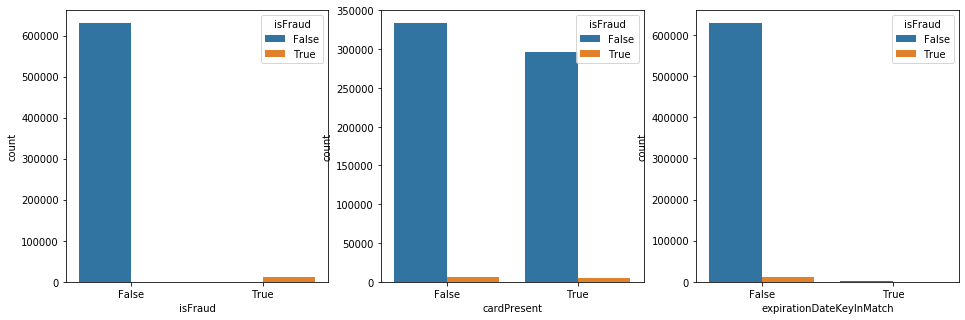

In [23]:
#Boolean Columns
fig, axes = plt.subplots(1, 3, figsize=(16,5))

for i, column in enumerate(bool_cols):
    sns.countplot(x=df[column], hue=df['isFraud'], ax=axes.flatten()[i])

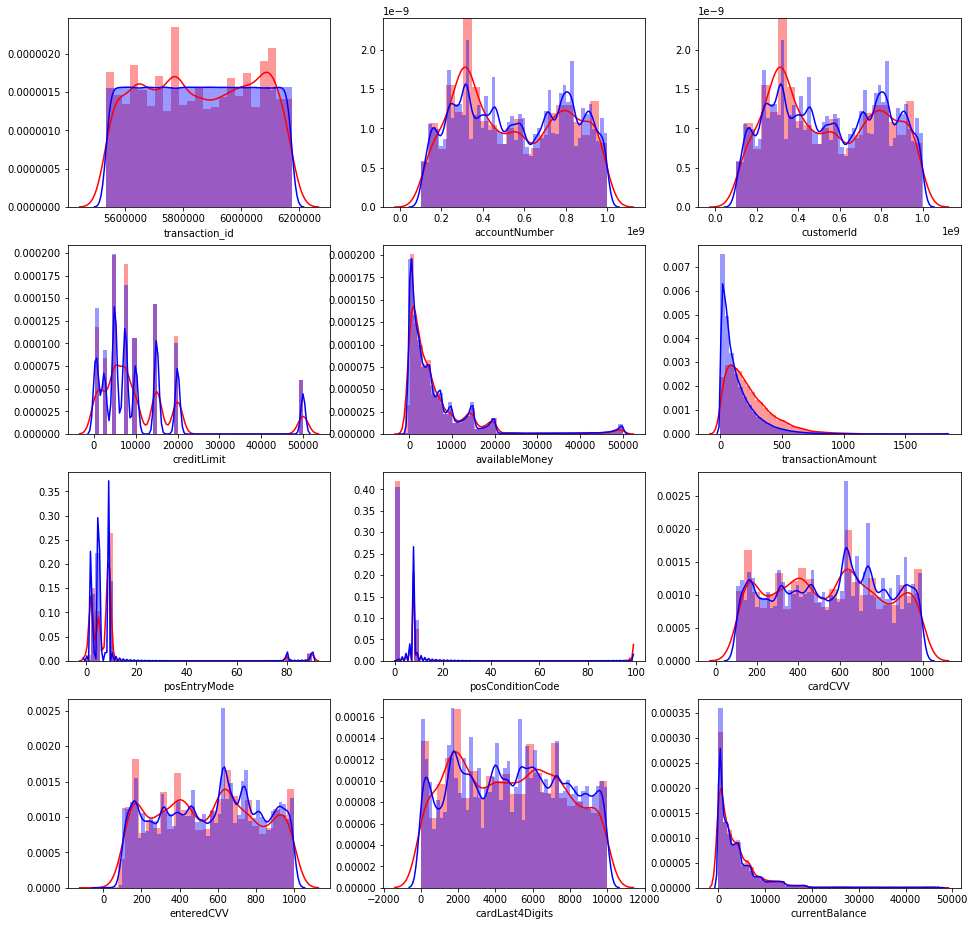

In [24]:
#Numeric Columns
fig, axes = plt.subplots(4, 3, figsize=(16,16))

for i, column in enumerate(num_cols):
    sns.distplot(df[df['isFraud']==True][column], color='red', hist_kws={'alpha':0.4}, ax=axes.flatten()[i])
    sns.distplot(df[df['isFraud']==False][column], color='blue', hist_kws={'alpha':0.4}, ax=axes.flatten()[i])

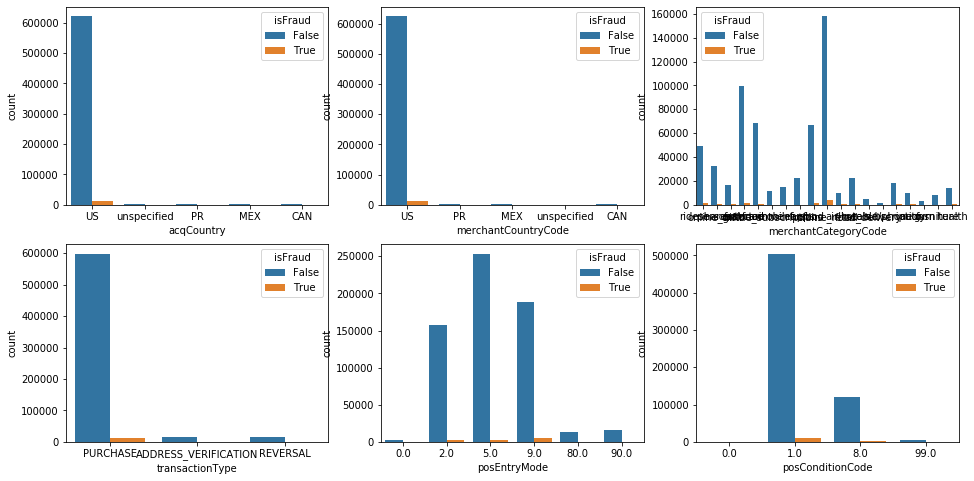

In [25]:
#Object Columns
fig, axes = plt.subplots(2, 3, figsize=(16,8))

for i, column in enumerate(['acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'transactionType', 'posEntryMode',
                           'posConditionCode']):
    sns.countplot(x=column, hue='isFraud', data=df, ax=axes.flatten()[i])

## Feature Extraction

In [26]:
#columns fraud ratio function
def ratio_feature(df, by, target, on):
    by_target_ratio = pd.DataFrame(df.groupby([by, target])[on].count()).reset_index()
    by_target_ratio = by_target_ratio.pivot(index=by, columns=target, values=on).reset_index()
    by_target_ratio = by_target_ratio.fillna(0)
    by_target_ratio['{}_fraud_ratio'.format(by)] = (by_target_ratio.iloc[:,2] / (by_target_ratio.iloc[:,1]+by_target_ratio.iloc[:,2])).round(4)
    by_target_ratio = by_target_ratio.iloc[:, lambda by_target_ratio: [0, -1]]
    return by_target_ratio

In [27]:
merchant = ratio_feature(df, 'merchantName', 'isFraud', 'customerId')
merchant.sort_values(by=['merchantName_fraud_ratio'], ascending=False)

isFraud,merchantName,merchantName_fraud_ratio
863,Hyatt House #786719,0.1957
860,Hyatt House #691218,0.1759
575,Fast Repair,0.1721
2328,Walgreens #856780,0.1579
858,Hyatt House #686333,0.1341
...,...,...
1732,Shake Shack #342712,0.0000
1130,Mobil Gas #864408,0.0000
1129,Mobil Gas #860755,0.0000
1128,Mobil Gas #851671,0.0000


In [28]:
merchant_cat = ratio_feature(df, 'merchantCategoryCode', 'isFraud', 'customerId')
merchant_cat.sort_values(by=['merchantCategoryCode_fraud_ratio'], ascending=False)

isFraud,merchantCategoryCode,merchantCategoryCode_fraud_ratio
11,hotels,0.0284
14,online_retail,0.0226
17,rideshare,0.0222
1,auto,0.0208
0,airline,0.0206
5,food,0.0204
13,online_gifts,0.0198
10,health,0.0192
4,fastfood,0.0172
3,entertainment,0.0134


In [29]:
transaction_type = ratio_feature(df, 'transactionType', 'isFraud', 'customerId')
transaction_type

isFraud,transactionType,transactionType_fraud_ratio
0,ADDRESS_VERIFICATION,0.0053
1,PURCHASE,0.0179
2,REVERSAL,0.0181


In [30]:
country = ratio_feature(df, 'acqCountry', 'isFraud', 'customerId')
country

isFraud,acqCountry,acqCountry_fraud_ratio
0,CAN,0.0267
1,MEX,0.0221
2,PR,0.0266
3,US,0.0174
4,unspecified,0.0348


In [31]:
card_present = ratio_feature(df, 'cardPresent', 'isFraud', 'customerId')
card_present

isFraud,cardPresent,cardPresent_fraud_ratio
0,False,0.0195
1,True,0.0155


In [32]:
exp_match = ratio_feature(df, 'expirationDateKeyInMatch', 'isFraud', 'customerId')
exp_match

isFraud,expirationDateKeyInMatch,expirationDateKeyInMatch_fraud_ratio
0,False,0.0176
1,True,0.0134


In [33]:
pos_entry = ratio_feature(df, 'posEntryMode', 'isFraud', 'customerId')
pos_entry

isFraud,posEntryMode,posEntryMode_fraud_ratio
0,0.0,0.0771
1,2.0,0.0191
2,5.0,0.0081
3,9.0,0.0279
4,80.0,0.0146
5,90.0,0.0202


In [34]:
pos_cond = ratio_feature(df, 'posConditionCode', 'isFraud', 'customerId')
pos_cond

isFraud,posConditionCode,posConditionCode_fraud_ratio
0,0.0,0.0453
1,1.0,0.0182
2,8.0,0.0139
3,99.0,0.0368


In [35]:
df = df.merge(merchant, how='left', on='merchantName')
df = df.merge(pos_cond, how='left', on='posConditionCode')
df = df.merge(pos_entry, how='left', on='posEntryMode')
df = df.merge(exp_match, how='left', on='expirationDateKeyInMatch')
df = df.merge(transaction_type, how='left', on='transactionType')
df = df.merge(country, how='left', on='acqCountry')
df = df.merge(card_present, how='left', on='cardPresent')

***Datetime Features***

In [36]:
df['deltasec'] = 0

for customer in df['customerId'].unique():
    df.loc[df['customerId']==customer, 'deltasec'] = df.loc[df['customerId']==customer, 'transactionDateTime'].diff()

In [37]:
#is the transaction made in less than an hour before the last transaction?
df['deltasec'] = df['deltasec'].fillna(999999999)
df['in_an_hour'] = [1 if deltasec/3600 < 1 else 0 for deltasec in df['deltasec']]

In [38]:
df['hour'] = df['transactionDateTime'].dt.hour
df['day'] = df['transactionDateTime'].dt.day
df['month'] = df['transactionDateTime'].dt.month
df['year'] = df['transactionDateTime'].dt.year

In [39]:
#count transactions per hour and per customer
freq_hourly = pd.DataFrame(df.groupby(['customerId', 'hour', 'day', 'month'])['transaction_id'].count()).reset_index()
freq_hourly.columns = ['customerId', 'hour', 'day', 'month', 'hourly_count']
freq_hourly.head()

,customerId,hour,day,month,hourly_count
0,100547107,0,18,7,1
1,100547107,1,2,1,1
2,100547107,1,17,7,1
3,100547107,1,20,2,1
4,100547107,1,21,9,1


In [40]:
#count transactions per day and per customer
freq_daily = pd.DataFrame(df.groupby(['customerId', 'day', 'month'])['transaction_id'].count()).reset_index()
freq_daily.columns = ['customerId', 'day', 'month', 'daily_count']
freq_daily.head()

,customerId,day,month,daily_count
0,100547107,1,4,1
1,100547107,1,5,1
2,100547107,1,10,1
3,100547107,1,12,1
4,100547107,2,1,1


In [41]:
#count transactions per month and per customer
freq_monthly = pd.DataFrame(df.groupby(['customerId', 'month'])['transaction_id'].count()).reset_index()
freq_monthly.columns = ['customerId', 'month', 'monthly_count']
freq_monthly.head()

,customerId,month,monthly_count
0,100547107,1,5
1,100547107,2,5
2,100547107,3,5
3,100547107,4,5
4,100547107,5,6


In [42]:
df = df.merge(freq_hourly, how='left', on=['customerId', 'hour', 'day', 'month'])
df = df.merge(freq_daily, how='left', on=['customerId', 'day', 'month'])
df = df.merge(freq_monthly, how='left', on=['customerId', 'month'])

In [43]:
#how many days from customers' first transaction to their last transaction
df['days_active'] = 0
col_index = df.columns.get_loc('transactionDateTime')

for customer in df['customerId'].unique():
    df_per_user = df[df['customerId']==customer]
    
    first_transaction = df_per_user.iloc[0, col_index]
    last_transaction = df_per_user.iloc[-1, col_index]
    
    df.loc[df['customerId']==customer, 'days_active'] = int((last_transaction - first_transaction).total_seconds()/86400)

In [44]:
#transactions that were made in different country as the previous transactions
df['shifted_acqCountry'] = df['acqCountry'].shift(-1).fillna(0) #shift acqCountry to get the next transaction country
df['diff_place'] = False

for customer in df['customerId'].unique():    
    df.loc[(df['customerId']==customer) & (df['acqCountry']!=df['shifted_acqCountry']), 'diff_place'] = True

In [45]:
#true if entered CVV is different than actual CVV
df['CVV_diff'] = False

df.loc[(df['cardCVV']!=df['enteredCVV']), 'CVV_diff'] = True

In [46]:
#minmax normalize
def normalize_min_max(df, column):
    return ((df[column] - df[column].min()) / (df[column].max() - df[column].min())).round(2)

In [47]:
normalize_list = ['transactionAmount', 'currentBalance', 'deltasec', 'in_an_hour', 'hourly_count', 'daily_count', 'monthly_count', 'days_active']

for column in normalize_list:
    df['{}_norm'.format(column)] = normalize_min_max(df, column)

In [48]:
#create more features by multiplying or adding features
df['v1'] = (df['transactionAmount_norm'] * df['posEntryMode_fraud_ratio'])**0.5
df['v2'] = (df['transactionAmount_norm'] * df['merchantName_fraud_ratio'])**0.5
df['v3'] = (df['transactionAmount_norm'] * df['posEntryMode_fraud_ratio'] * df['merchantName_fraud_ratio'])**0.33
df['v4'] = (df['transactionAmount_norm'] + df['days_active_norm'] + df['diff_place']) /3
df['v5'] = (df['transactionAmount_norm'] * df['days_active_norm'] * df['merchantName_fraud_ratio'])**0.33

df['v6'] = (df['posEntryMode_fraud_ratio'] * df['merchantName_fraud_ratio'])**0.5
df['v7'] = (df['posEntryMode_fraud_ratio'] * df['days_active_norm'])**0.5
df['v8'] = (df['merchantName_fraud_ratio'] * df['days_active_norm'])**0.5
df['v9'] = (df['merchantName_fraud_ratio'] * df['posConditionCode_fraud_ratio'])**0.5
df['v10'] = (df['transactionType_fraud_ratio'] * df['posConditionCode_fraud_ratio'])**0.5

df['v11'] = df['v1'] * df['v2']
df['v12'] = df['v1'] * df['v4']
df['v13'] = df['v3'] * df['v10']
df['v14'] = df['v1'] * df['v9']
df['v15'] = (df['v1'] * df['v9'] * df['v10'])**0.5

Text(0.5, 1, 'Variables Correlation Heatmap')

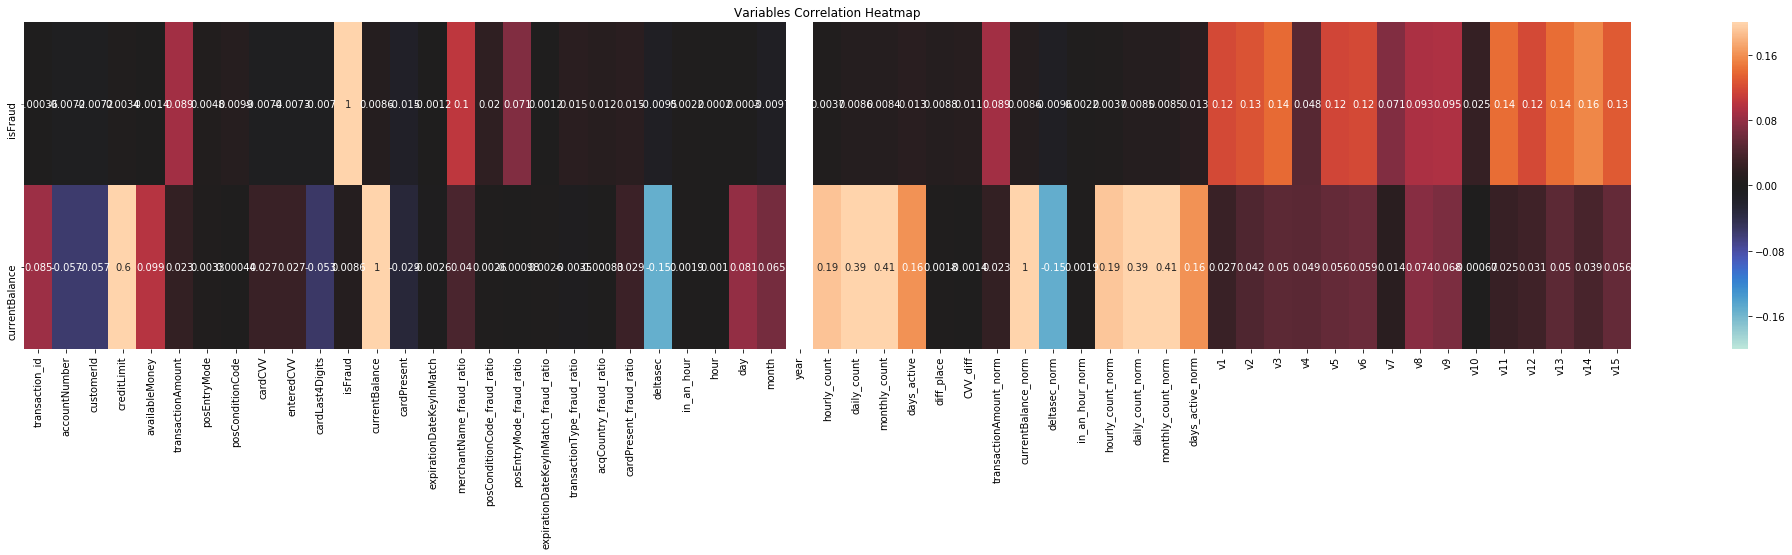

In [49]:
corr = df.corr()
corr2 = corr.loc['isFraud':'currentBalance',:]

plt.figure(figsize=(36,6))
ax = sns.heatmap(corr2, annot=True, vmin=-0.2, vmax=0.2, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Variables Correlation Heatmap')

Text(0.5, 1, 'Variables Correlation Heatmap')

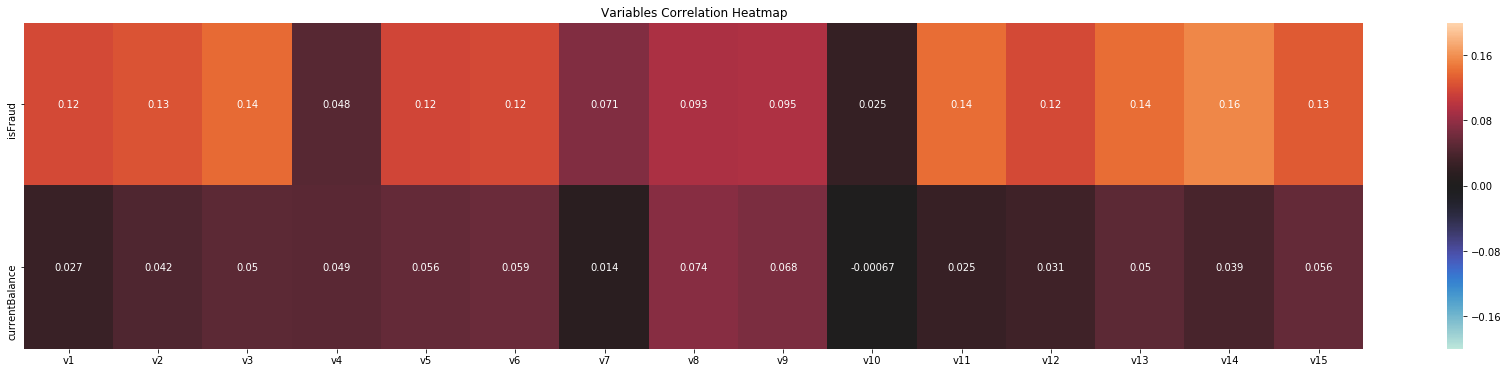

In [50]:
corr = df.corr()
corr2 = corr.loc['isFraud':'currentBalance','v1':'v15']

plt.figure(figsize=(30,6))
ax = sns.heatmap(corr2, annot=True, vmin=-0.2, vmax=0.2, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Variables Correlation Heatmap')